# Introduction


**What?** Loss functions



# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 5
rcParams['font.size'] = 20

# Regression losses


- MSE
- MAE
- Huber loss
- Los cosh loss
- Quantile loss



## Mean Square Error (MSE/ L2 Loss)


- **ATTENTION**
- This notebook uses the nomenclature MSE but is not getting the mean, in the sense it is not dividing by the total number of samples!





$ MSE = \sum\limits_{i=1}^n  {(y_i - y_i^p)}^2 $  



In [2]:
def mse(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean square error loss
    """
    
    return np.sum((true - pred)**2)

Text(0.5, 1.0, 'MSE Loss vs. Predictions')

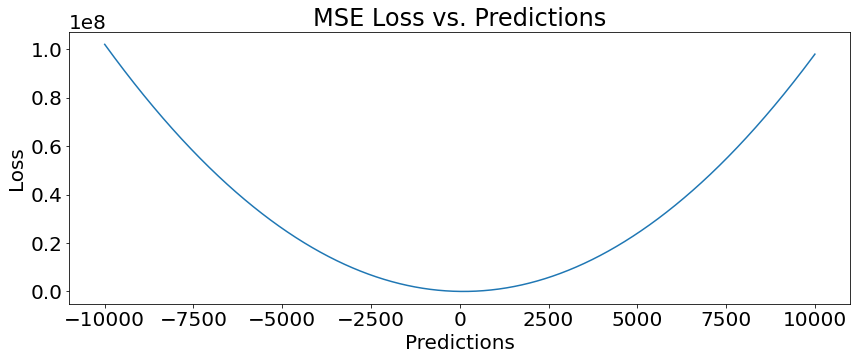

In [3]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)

loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]

ax1.plot(pred, loss_mse)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MSE Loss vs. Predictions")
#fig.tight_layout()

## Mean Absolute Error (MAE/ L1 loss)


- MAE is the sum of absolute differences between our target and predicted variables. 
- So it measures the average magnitude of errors in a set of predictions, without considering their directions.<br>
$ MAE = \sum\limits_{i=1}^n  {|y_i - y_i^p|} $  



In [4]:
def mae(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean absolute error loss
    """
    
    return np.sum(np.abs(true - pred))

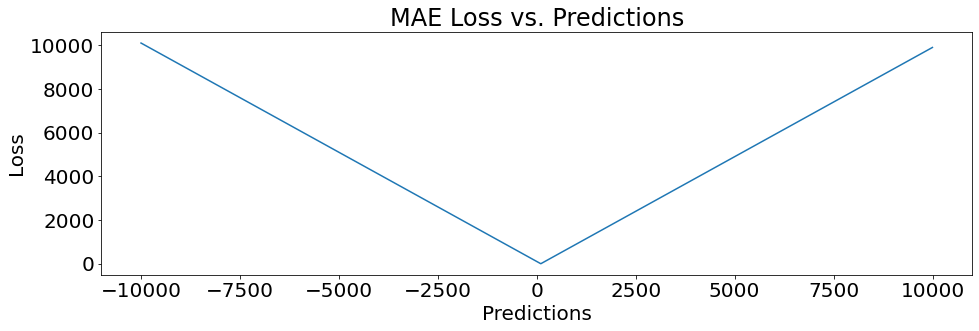

In [5]:
fig, ax1 = plt.subplots(1,1)

target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)
loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]

ax1.plot(pred, loss_mae)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MAE Loss vs. Predictions")

fig.tight_layout()

## Mean Bias Error = MBE


- If we consider directions also, that would be called Mean Bias Error (MBE).
- This is the sum of residuals/errors:<br>
$ MBE = \sum\limits_{i=1}^n  {y_i - y_i^p} $      



In [6]:
def mbe(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean absolute error loss
    """
    
    return np.sum(true - pred)

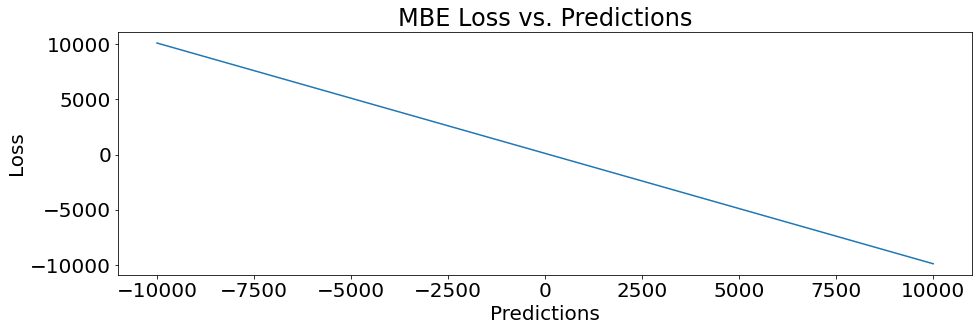

In [7]:
fig, ax1 = plt.subplots(1,1)

target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)
loss_mae = [mbe(target[i], pred[i]) for i in range(len(pred))]

ax1.plot(pred, loss_mae)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MBE Loss vs. Predictions")

fig.tight_layout()

## Smooth Mean Absolute Error aka Huber Loss 


- Huber loss is less sensitive to outliers in data than the squared error loss. 
- It’s also differentiable at 0. 
- It’s basically absolute error, which becomes quadratic when error is small.
- How small that error has to be to make it quadratic depends on a hyperparameter, 𝛿 (delta), which can be tuned. 
- Huber loss approaches MSE when 𝛿 ~ 0 and MAE when 𝛿 ~ ∞ (large numbers.)
- Residuals larger than delta are minimized with L1 (which is less sensitive to large outliers)
- Residuals smaller than delta are minimized “appropriately” with L2.



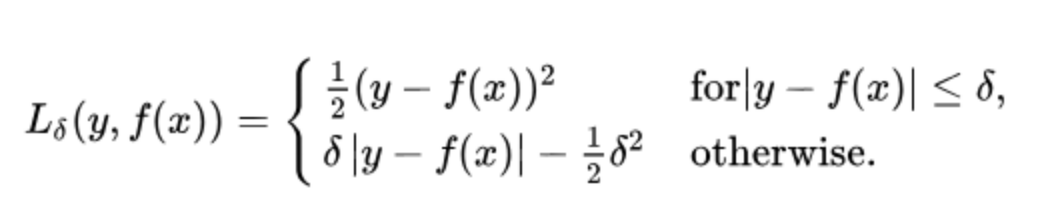

In [8]:
def sm_mae(true, pred, delta):
    """
    true: array of true values    
    pred: array of predicted values

    returns: smoothed mean absolute error loss
    """
    loss = np.where(np.abs(true-pred) < delta, 0.5*((true-pred)**2),
                    delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

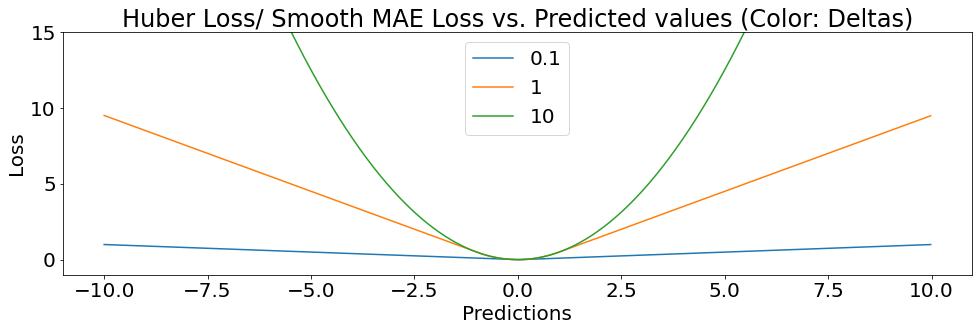

In [9]:
fig, ax1 = plt.subplots(1,1)

target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)
delta = [0.1, 1, 10]
losses_huber = [[sm_mae(target[i], pred[i], q) for i in range(len(pred))] for q in delta]


for i in range(len(delta)):
    ax1.plot(pred, losses_huber[i], label = delta[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Huber Loss/ Smooth MAE Loss vs. Predicted values (Color: Deltas)")
ax1.legend()
ax1.set_ylim(bottom=-1, top = 15)
fig.tight_layout()


- **Why use Huber Loss?**
- One big problem with using MAE for training of neural nets is its constantly large gradient, which can lead to missing minima at the end of training using gradient descent. For MSE, gradient decreases as the loss gets close to its minima, making it more precise.
- Huber loss can be really helpful in such cases, as it curves around the minima which decreases the gradient. And it’s more robust to outliers than MSE. Therefore, it combines good properties from both MSE and MAE. However, the problem with Huber loss is that we might need to train hyperparameter delta which is an iterative process.



## Log cosh loss


- Log-cosh is the logarithm of the hyperbolic cosine of the prediction error.
- Log cosh loss is smoother than L2.
- **Pros**: log(cosh(x)) is approximately equal to (x ** 2) / 2 for small x and to abs(x) - log(2) for large x. This means that 'logcosh' works mostly like the mean squared error, but will not be so strongly affected by the occasional wildly incorrect prediction. It has all the advantages of Huber loss, and it’s twice differentiable everywhere, unlike Huber loss.
- **Why do we need a 2nd derivative?** Many ML algorithms use Newton’s method to find the optimum, which is why the second derivative (Hessian) is needed. For ML frameworks like XGBoost, twice differentiable functions are more fav    
- **Cons**: It still suffers from the problem of gradient and hessian for very large off-target predictions being constant, therefore resulting in the absence of splits for XGBoost.

$ L(y, y^p) = \sum\limits_{i=1}^n  {\log(\cosh(y_i^p-y_i))} $  



In [10]:
def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

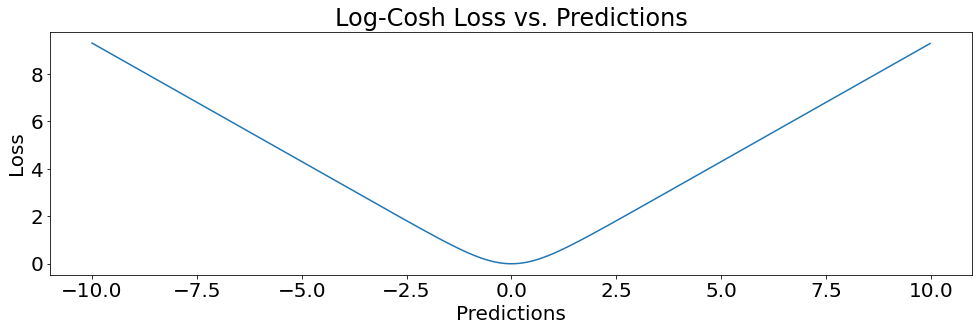

In [11]:
fig, ax1 = plt.subplots(1,1)

target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

loss_logcosh = [logcosh(target[i], pred[i]) for i in range(len(pred))]

# plot 
ax1.plot(pred, loss_logcosh)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Log-Cosh Loss vs. Predictions")

fig.tight_layout()

## Quantile loss


- **Motivation?>** Quantile loss functions turn out to be useful when we are interested in predicting an interval instead of only point predictions.
- **What is the issue of linear model?** Prediction interval from least square regression is based on an assumption that residuals (y — y_hat) have constant variance across values of independent variables. We can not trust linear regression models that violate this assumption.
- **But** We can not also just throw away the idea of fitting a linear regression model as the baseline by saying that such situations would always be better modeled using non-linear functions or tree-based models. 
- **What alternative do we have?** Quantile regression come to the rescue as regression-based on quantile loss provides sensible prediction intervals even for residuals with non-constant variance or non-normal distribution.

- $ L_\gamma(y, y^p) = \sum\limits_{i=y_i<y_i^p}  ({\gamma-1}).|y_i - y_i^p| + \sum\limits_{i=y_i\geq y_i^p}  ({\gamma}).|y_i - y_i^p|  $  



In [12]:
def quan(true, pred, theta):
    loss = np.where(true >= pred, theta*(np.abs(true-pred)),
                    (1-theta)*(np.abs(true-pred)))
    return np.sum(loss)

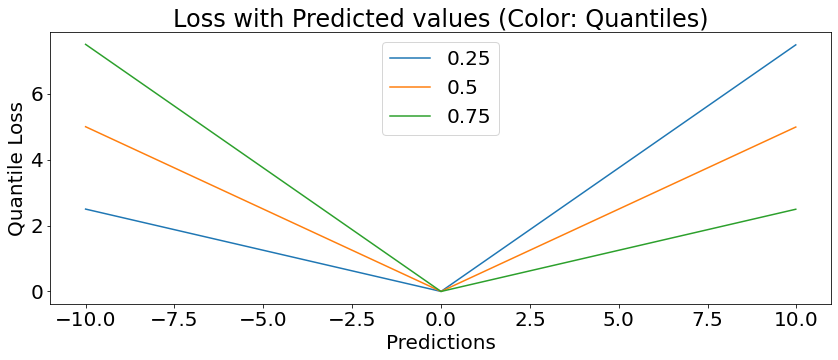

In [13]:
fig, ax1 = plt.subplots(1, 1)

target = np.repeat(0, 1000)
pred = np.arange(-10, 10, 0.02)
quantiles = [0.25, 0.5, 0.75]
losses_quan = [[quan(target[i], pred[i], q)
                for i in range(len(pred))] for q in quantiles]

for i in range(len(quantiles)):
    ax1.plot(pred, losses_quan[i], label=quantiles[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Quantile Loss')
ax1.set_title("Loss with Predicted values (Color: Quantiles)")
ax1.legend()

## Comparison of all regression losses

(0.0, 40.0)

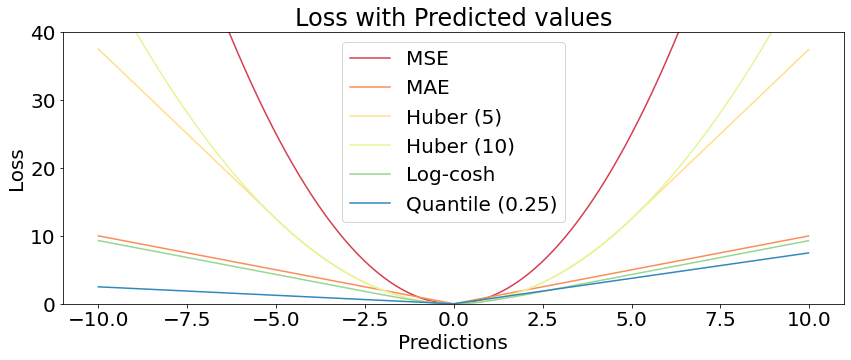

In [14]:
fig, ax1 = plt.subplots(1, 1)

target = np.repeat(0, 1000)
pred = np.arange(-10, 10, 0.02)

# calculating loss function for all predictions.
loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]
loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]
loss_sm_mae1 = [sm_mae(target[i], pred[i], 5) for i in range(len(pred))]
loss_sm_mae2 = [sm_mae(target[i], pred[i], 10) for i in range(len(pred))]
loss_logcosh = [logcosh(target[i], pred[i]) for i in range(len(pred))]
loss_quan1 = [quan(target[i], pred[i], 0.25) for i in range(len(pred))]


losses = [loss_mse, loss_mae, loss_sm_mae1,
          loss_sm_mae2, loss_logcosh, loss_quan1]
names = ['MSE', 'MAE', 'Huber (5)', 'Huber (10)',
         'Log-cosh', 'Quantile (0.25)']
cmap = ['#d53e4f',
        '#fc8d59',
        '#fee08b',
        '#e6f598',
        '#99d594',
        '#3288bd']

for lo in range(len(losses)):
    ax1.plot(pred, losses[lo], label=names[lo], color=cmap[lo])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Loss with Predicted values")
ax1.legend()
ax1.set_ylim(bottom=0, top=40)

# Classification losses


- Binary cross entropy 
- Negative log likelihood
- Cross entropy
- Kullback–Leibler divergence



## Binary cross entropy or negative log likelihood

In [15]:
def bin_ce(true, pred):
    """
    true: array of true values    
    pred: array of predicted values

    returns: binary cross entropy loss
    """
    loss = np.where(true == 1, np.log(pred), np.log(1-pred))
    return -np.sum(loss)

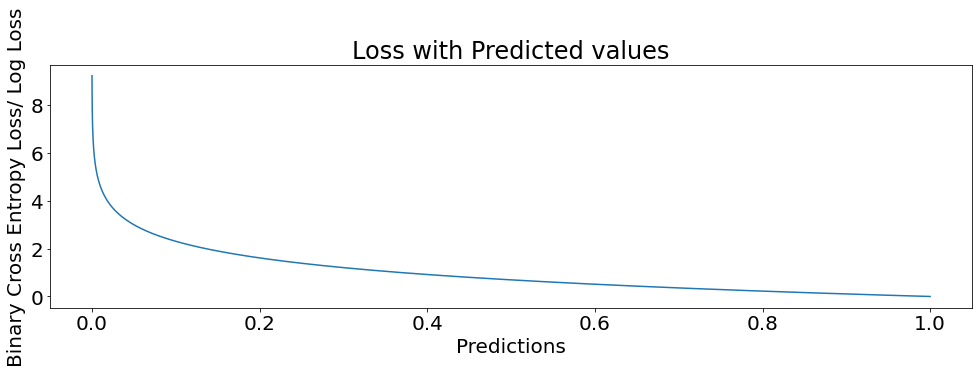

In [16]:
fig, ax1 = plt.subplots(1, 1)

# array of same target value 10000 times
target = np.repeat(1, 10000)  # considering prediction to be 1
pred = np.arange(0, 1, 0.0001)  # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions.
loss_bin_ce = [bin_ce(target[i], pred[i]) for i in range(len(pred))]

# plot for binary cross entropy
ax1.plot(pred, loss_bin_ce)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Binary Cross Entropy Loss/ Log Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()
# fig.savefig()

## Focal loss

In [17]:
def focal(true, pred, gamma):
    """
    true: array of true values    
    pred: array of predicted values

    returns: binary cross entropy loss
    """
    loss = np.where(true == 1, (1-pred)**gamma*(np.log(pred)),
                    pred**gamma*(np.log(1-pred)))
    return -np.sum(loss)

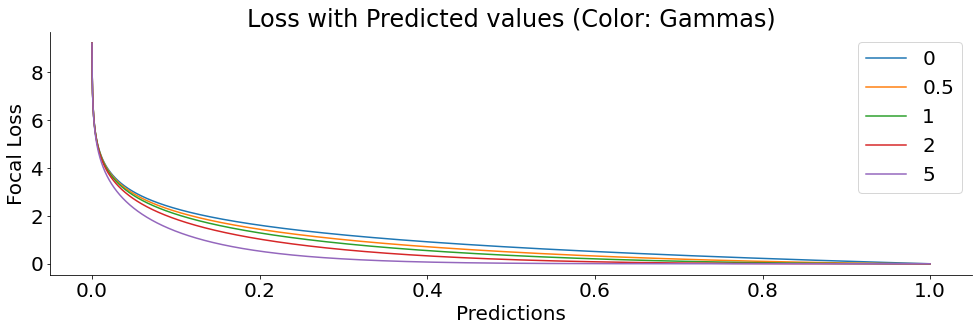

In [18]:
fig, ax1 = plt.subplots(1, 1)

# array of same target value 10000 times
target = np.repeat(1, 10000)  # considering prediction to be 1
pred = np.arange(0, 1, 0.0001)  # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions.
gammas = [0, 0.5, 1, 2, 5]
losses_focal = [[focal(target[i], pred[i], gamma)
                 for i in range(len(pred))] for gamma in gammas]

# plot for binary cross entropy
for i in range(len(gammas)):
    ax1.plot(pred, losses_focal[i], label=gammas[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Focal Loss')
ax1.set_title("Loss with Predicted values (Color: Gammas)")
ax1.legend()

# make right and top lines invisible
# Make the top axis line for a plot invisible
ax1.spines['top'].set_visible(False)
# Make the right axis line for a plot invisible
ax1.spines['right'].set_visible(False)

fig.tight_layout()

## Hinge loss

In [19]:
def hinge(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = np.max((0, (1 - pred*true)))
    return np.sum(loss)

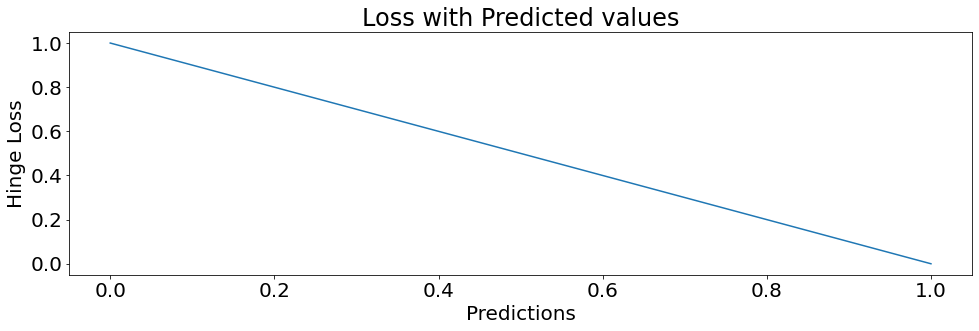

In [20]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_hinge = [hinge(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_hinge)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Hinge Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

## Square loss

In [21]:
def sq_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = (1 - pred*true)**2
    return np.sum(loss)

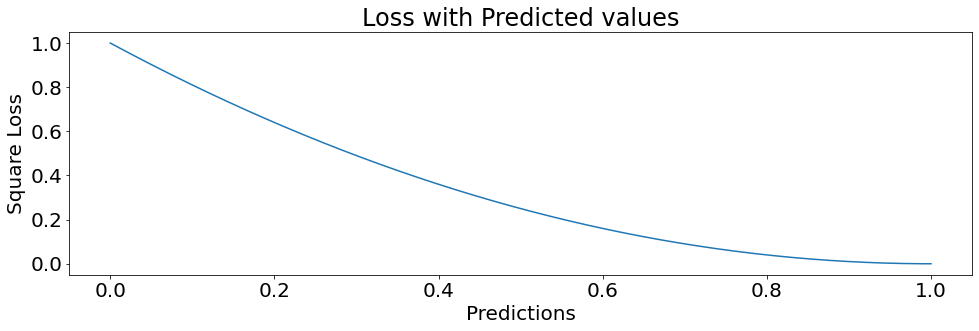

In [22]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_sq = [sq_loss(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_sq)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Square Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

## Logistic loss

In [23]:
def log_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = np.log(1 + np.exp(-(pred*true)))/np.log(2)
    return np.sum(loss)

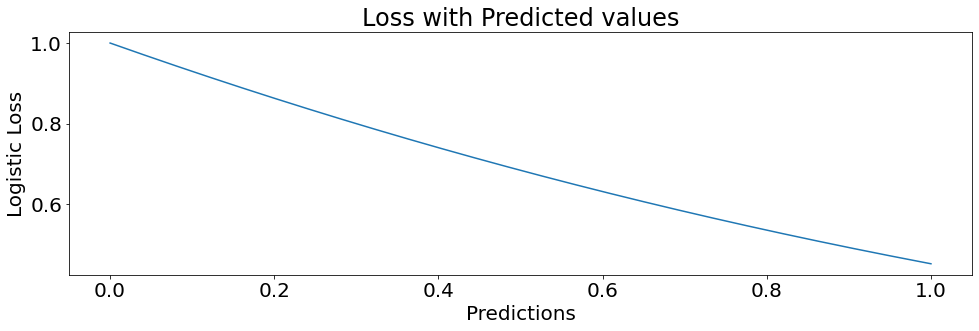

In [24]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_log_loss = [log_loss(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_log_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Logistic Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

## Exponential loss

In [ ]:
fig, ax1 = plt.subplots()

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_exp = [np.exp(target[i], pred[i], 100) for i in range(len(pred))]

# plot for exponential loss
ax1.plot(pred, loss_exp)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Exponential Loss')
ax1.set_title("Loss with Predicted values")
fig.tight_layout()

## Kullback–Leibler divergence

In [ ]:
def kld(true, pred):
    """
    true: array of true values    
    pred: array of predicted values

    returns: KL divergence loss
    """
    loss = pred*(np.log(pred) - true)
    return np.sum(loss)

# Conclusion


- The message is that the choice of loss function really depends on your problem.



# References


- [Reference article](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)
- [Reference code](https://nbviewer.jupyter.org/github/groverpr/Machine-Learning/blob/master/notebooks/05_Loss_Functions.ipynb)

